# Tensorflow Classification Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv('datasets/magic04.data', 
                   names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])

data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
data['class'] = (data['class'] == 'g').astype(int)
data['class'].unique()

array([1, 0])

##### Feature/Label split

In [4]:
X = data.drop('class', axis=1)
y = data['class']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))

##### Simple Model training

In [41]:
model = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

##### Accuracy Plot

In [43]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

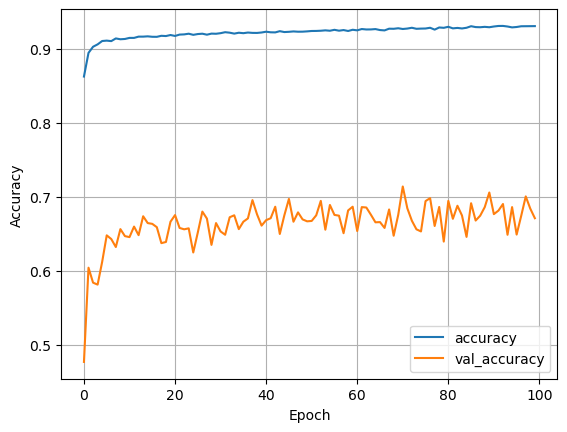

In [44]:
plot_accuracy(history)

In [45]:
max(history.history['val_accuracy'])

0.7139852643013

##### Model with Dropout Layers

In [27]:
model = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

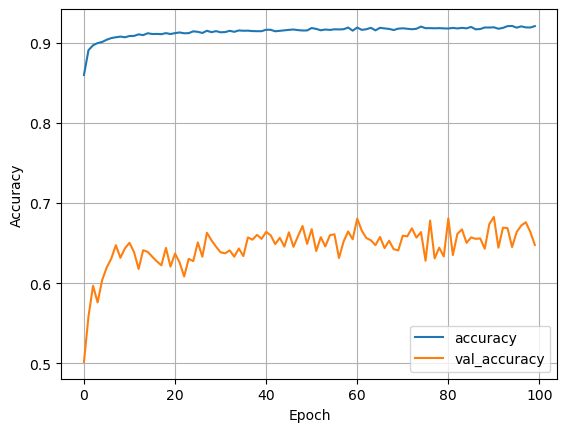

In [29]:
plot_accuracy(history)

In [31]:
max(history.history['val_accuracy'])

0.6827024221420288

##### Hyperparamter tuning

In [ ]:
for layersize in [32, 48, 64]:
    for batch in [32, 64, 128]:
        for learning_rate in [0.01, 0.005, 0.001]:
            
        model = tf.keras.Sequential([
            Dense(layersize, activation='relu', input_shape=(10,)),
            Dense(layersize, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=Adam(learning_rate), 
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        history = model.fit(X, y, epochs=100, batch_size=batch, validation_split=0.2, verbose=0)
        
        print(f'Accuracy {rounmax(history.history['accuracy'])}')

48